# Covid-19 Vaccine Adverse Reaction Prediction using VAERS Dataset

## Background
Start from 2020, Covid-19 is begin to spread around the world, with more than 220 million confirmed cases and 4.5 million deaths across almost 200 countries.Luckily nowadays, have few vaccine for the covid-19 have been released. But based on the research, most of the vaccine have adverse reaction, even have threat recipient life. 



## Objective
To predict whether recipient will died or not using machine learning algorithms. The algorithms used are Logistic Regression, K-NearestNeighbor, Decision Tree, Gaussian Naive Bayes, Support Vector Machine, Artificial Neural Network and Random Forest.

### Abstract
The dataset used is vaers_jan_aug_2021.csv file and it includes various kind of variables, but only some of the vairables will be use on this project. The dataset used is from Kaggle. https://www.kaggle.com/landfallmotto/covid19-vaccine-adverse-reactions-vaers-dataset

# Data Understanding
## Describe data
There are 53 columns inside the dataset, and the datatype are integer, float and object type. Since this data set is collect through the VAERS form, this form have 1 and 2, and form 1 and form 2 have slightly different(form 1 have some field than form 2 is not include), and only 365 is collected from form 1, then will drop all the form 1 observation and drop the column only form 1 included like RPT_DATE, ER_VISIT and etc.

Also drop some useless informaiton like CAGE_TR, CAGE_MO, VAX_DATE, and etc.
You can review from https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf to get more for this data set column's defination.




In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
#read the data file
df=pd.read_csv('vaers_jan_aug_2021.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,29,32,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603462 entries, 0 to 603461
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         603462 non-null  int64  
 1   SYMPTOM1         603462 non-null  object 
 2   SYMPTOMVERSION1  603462 non-null  float64
 3   SYMPTOM2         479853 non-null  object 
 4   SYMPTOMVERSION2  479853 non-null  float64
 5   SYMPTOM3         375217 non-null  object 
 6   SYMPTOMVERSION3  375217 non-null  float64
 7   SYMPTOM4         285679 non-null  object 
 8   SYMPTOMVERSION4  285679 non-null  float64
 9   SYMPTOM5         212253 non-null  object 
 10  SYMPTOMVERSION5  212253 non-null  float64
 11  VAX_TYPE         603462 non-null  object 
 12  VAX_MANU         603462 non-null  object 
 13  VAX_LOT          428527 non-null  object 
 14  VAX_DOSE_SERIES  600377 non-null  object 
 15  VAX_ROUTE        471843 non-null  object 
 16  VAX_SITE         485734 non-null  obje

In [4]:
df['FORM_VERS'].value_counts()

2    603097
1       365
Name: FORM_VERS, dtype: int64

In [5]:
df.drop(df.loc[df['FORM_VERS']==1].index, inplace=True)

In [6]:
df=df.drop(['FORM_VERS','VAX_DOSE_SERIES','VAX_NAME','VAX_ROUTE','VAX_SITE','VAX_LOT','SYMPTOMVERSION1','SYMPTOMVERSION2',
                'SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5','VAX_TYPE','RECVDATE','STATE','CAGE_YR','CAGE_MO',
                'RPT_DATE','ER_VISIT','V_ADMINBY','V_FUNDBY','TODAYS_DATE','SPLTTYPE','SYMPTOM_TEXT','DATEDIED','HOSPDAYS','LAB_DATA','PRIOR_VAX',
                'NUMDAYS','VAX_DATE','HISTORY','OTHER_MEDS','ALLERGIES','ONSET_DATE','VAERS_ID','L_THREAT','HOSPITAL','X_STAY','OFC_VISIT','ER_ED_VISIT'],axis='columns')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603097 entries, 0 to 603461
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SYMPTOM1      603097 non-null  object 
 1   SYMPTOM2      479599 non-null  object 
 2   SYMPTOM3      375040 non-null  object 
 3   SYMPTOM4      285556 non-null  object 
 4   SYMPTOM5      212179 non-null  object 
 5   VAX_MANU      603097 non-null  object 
 6   AGE_YRS       569364 non-null  float64
 7   SEX           603097 non-null  object 
 8   DIED          9634 non-null    object 
 9   DISABLE       13928 non-null   object 
 10  RECOVD        552246 non-null  object 
 11  CUR_ILL       334139 non-null  object 
 12  BIRTH_DEFECT  429 non-null     object 
dtypes: float64(1), object(12)
memory usage: 64.4+ MB


# Check missing value
Only SYMpTOM1, VAX_MANU, and SEX is not missing value.

## Handle missing value
For SYMPTOM2 to 5, have missing value is normal, since not all the recipient have more than 1 symptom.

For column AGE_YRS, will drop the missing value.

For column DIED until BIRTH_DEFECT, will assign 'n' to missing value, since this data is collected from VAERS form, the empty mean none like column DIED, missing value means the recipient not died.

In [8]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
SYMPTOM1             0
SYMPTOM2        123498
SYMPTOM3        228057
SYMPTOM4        317541
SYMPTOM5        390918
VAX_MANU             0
AGE_YRS          33733
SEX                  0
DIED            593463
DISABLE         589169
RECOVD           50851
CUR_ILL         268958
BIRTH_DEFECT    602668
dtype: int64


In [9]:
df['AGE_YRS'].fillna('unknow',inplace=True)
df.drop(df.loc[df['AGE_YRS']=='unknow'].index, inplace=True)


In [10]:
#replace Nan value to N, assume missing value is no in these column.
df['DIED'].fillna('N',inplace=True)
df['DISABLE'].fillna('N',inplace=True)
df['CUR_ILL'].fillna('N',inplace=True)
df['BIRTH_DEFECT'].fillna('N',inplace=True)
df['RECOVD'].fillna('U',inplace=True)

In [11]:
# After drop and replace the missing value, only left SYMPTOM 2 to 5 have missing value.
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0))

Missing values per column:
SYMPTOM1             0
SYMPTOM2        112698
SYMPTOM3        210127
SYMPTOM4        293893
SYMPTOM5        364158
VAX_MANU             0
AGE_YRS              0
SEX                  0
DIED                 0
DISABLE              0
RECOVD               0
CUR_ILL              0
BIRTH_DEFECT         0
dtype: int64


# Check the columns unique

Have 4 vaccine manufacture, which are Jassen, Moderna, Pfizer and unknow manufacture. So will drop the unknow manufacture.
Have 3 value in SEX column, so drop the recipient who are unknow sex.

In [12]:
df.nunique()

SYMPTOM1         5885
SYMPTOM2         5656
SYMPTOM3         5230
SYMPTOM4         4737
SYMPTOM5         4384
VAX_MANU            4
AGE_YRS           139
SEX                 3
DIED                2
DISABLE             2
RECOVD              3
CUR_ILL         39075
BIRTH_DEFECT        2
dtype: int64

In [13]:
df['VAX_MANU'].value_counts()

MODERNA                 259656
PFIZER\BIONTECH         253366
JANSSEN                  55139
UNKNOWN MANUFACTURER      1203
Name: VAX_MANU, dtype: int64

In [14]:
df['SEX'].value_counts()

F    409465
M    157023
U      2876
Name: SEX, dtype: int64

In [15]:
df.drop(df.loc[df['VAX_MANU']=='UNKNOWN MANUFACTURER'].index, inplace=True)

df.drop(df.loc[df['SEX']=='U'].index, inplace=True)

# Data cleaning

## Check the value of the SYMPTOM and CUR_ILL
Replace the similar definition to one, like high blood pressure replace to hypentension.

In [16]:
#replace value to lowercase
df["CUR_ILL"] = df["CUR_ILL"].str.lower()
df["SYMPTOM1"] = df["SYMPTOM1"].str.lower()
df["SYMPTOM2"] = df["SYMPTOM2"].str.lower()
df["SYMPTOM3"] = df["SYMPTOM3"].str.lower()
df["SYMPTOM4"] = df["SYMPTOM4"].str.lower()
df["SYMPTOM5"] = df["SYMPTOM5"].str.lower()

In [17]:
# check the top 60 value for CUR_ILL column
df['CUR_ILL'].value_counts().head(60)

# Can observe that s many is represent no illness when vaccine, 
#but the recipient write different word to represent. So need clean it.

n                                      236052
none                                   193972
no                                      20953
unknown                                  9437
none.                                    5599
none known                               2789
none reported                            2654
n/a                                      2073
na                                       1299
seasonal allergies                       1055
asthma                                    788
denies                                    727
sinus infection                           572
no.                                       540
uti                                       504
hypertension                              460
no illnesses                              451
none noted                                418
diabetes                                  390
0                                         376
nothing                                   368
non                               

In [18]:
df=df.replace(to_replace =["none reported.","no other illnesses.","not applicable","not reported","none","no","unknown"
                            ,"none.","none known","none reported","n/a","na","no.","no illnesses","none noted","0","none per patient",
                            "nothing","non","not known","unk","no known","none listed","no illness","no acute illness",
                            "no known illnesses","no acute illnesses","none known.","i did not have any other illnesses.","denies"
                            ,"none stated","unknown.","denied","no other illnesses","-","nka","no e","unkown","nil","none documented"
                            ,"no illnesses at the time of vaccination.","nonr","zero","none disclosed","no illnesses.","?"
                            ,"none that i am aware of","nome"],value="n")

In [19]:
# Check the top 60 column for symptom1
df['CUR_ILL'].value_counts().head(60)

n                                    482224
seasonal allergies                     1055
asthma                                  788
sinus infection                         572
uti                                     504
hypertension                            460
diabetes                                390
allergies                               293
high blood pressure                     267
migraine                                255
covid-19                                254
migraines                               249
abstains from alcohol; non-smoker       246
anxiety                                 227
rheumatoid arthritis                    197
hypothyroidism                          188
cold                                    171
copd                                    163
covid                                   157
urinary tract infection                 138
diabetic                                136
gerd                                    130
anemia                          

In [20]:
# Can observe that have some illness and symptom have same definition but different word, like high blood pressure is hypertension,
# So, will replace the value.
df=df.replace(to_replace=["seasonal allergy","seasonal allergies","seasonal allergies.","penicillin allergy",""],value="allergies")

df=df.replace(to_replace=["high blood pressure","blood pressure high","htn"],value="hypertension")

df=df.replace(to_replace=["urinary tract infection"],value="uti")

df=df.replace(to_replace=["covid 19","covid"],value="covid-19")

df=df.replace(to_replace=["sinus congestion","strep throat","sore throat"],value="sinus infection")

df=df.replace(to_replace=["injection site erythema","injection site swelling","injection site pruritus","injection site pain"
                           ,"injection site warmth","injection site rash","vaccination site pain"
                           ,"injection site induration"],value="injection side")

df=df.replace(to_replace=["myalgia","pain in extremity","arthralgia","neck pain"],value="pain")

df=df.replace(to_replace=["paraesthesia","malaise","feeling abnormal"],value="uncomfortable")

df=df.replace(to_replace=["dyspnoea","chest discomfort","chest pain"],value="breathing problem")

df=df.replace(to_replace=["migraine","migraines"],value="headache")

df=df.replace(to_replace=["feeling cold"],value="chills")

df=df.replace(to_replace=["feeling hot","body temperature increased","body temperature"],value="pyrexia")

df=df.replace(to_replace=["heart rate increased"],value="tremor")

df=df.replace(to_replace=["syncope"],value="dizziness")

df=df.replace(to_replace=["sars-cov-2 test positive","covid-19 pneumonia"],value="covid-19")

In [21]:
# Replace AGE_YRS to 5 group
def age_transfor(df) :
    
    if df["AGE_YRS"] < 18 :
        return "Child"
    elif (df["AGE_YRS"] >= 18) & (df["AGE_YRS"] < 45 ):
        return "Young Adult"
    elif (df["AGE_YRS"] >= 45) & (df["AGE_YRS"] < 60) :
        return "Senior Adult"
    elif (df["AGE_YRS"] >= 60) & (df["AGE_YRS"] < 80) :
        return "Senior Citizen"
    elif df["AGE_YRS"] >= 80 :
        return "Very Senior Citizen"
    
df["age_group"] = df.apply(lambda df:age_transfor(df),
                                      axis = 1)


In [22]:
# drop duplicates
df=df.drop_duplicates()

In [23]:
# Check duplicate
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [SYMPTOM1, SYMPTOM2, SYMPTOM3, SYMPTOM4, SYMPTOM5, VAX_MANU, AGE_YRS, SEX, DIED, DISABLE, RECOVD, CUR_ILL, BIRTH_DEFECT, age_group]
Index: []


# Data visualization

<AxesSubplot:ylabel='None'>

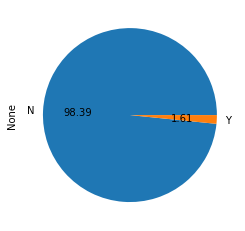

In [24]:
# Check proportion DEID column
df.groupby('DIED').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

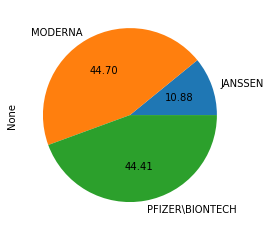

In [25]:
# Check proportion VAX_MANU column
df.groupby('VAX_MANU').size().plot(kind='pie', autopct='%.2f')

In [26]:
#Seperating the data for visuaization use
ndf=df

## Sepearte binary and multi category column.
binary category column: SEX, DISABLE, BIRTH_DEFECT

multi category column: VAX_MANU, age_group, RECOVD

In [27]:
#Separating DIED and non DIED customers
died     = ndf[ndf["DIED"] == "Y"]
not_died = ndf[ndf["DIED"] == "N"]


target_col = ["DIED"]

bi_cat_cols   = ndf.nunique()[ndf.nunique() == 2].keys().tolist()
bi_cat_cols   = [x for x in bi_cat_cols if x not in target_col]

cat_cols=ndf.nunique()[ndf.nunique() <6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col+bi_cat_cols]


In [28]:
import plotly.graph_objs as go#visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt#visualization
from PIL import Image
%matplotlib inline
import seaborn as sns #visualization
from plotly.offline import init_notebook_mode, plot_mpl
def plot_pie(column) :
    
    trace1 = go.Pie(values  = died[column].value_counts().values.tolist(),
                    labels  = died[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Died",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_died[column].value_counts().values.tolist(),
                    labels  = not_died[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non died" 
                   )


    layout = go.Layout(dict(title = column + " VS DIED ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            
                            annotations = [dict(text = "After vaccination died",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "After vaccination not died",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
  
    py.iplot(fig)


In [29]:
for i in bi_cat_cols :
    plot_pie(i)

In [30]:
for i in cat_cols :
    plot_pie(i)

In [31]:
#After drop the duplicate, check the info
df.shape

(470404, 14)

After filter some row and column are useless, then transfor the age 

In [32]:
df['DIED'].value_counts()

N    462839
Y      7565
Name: DIED, dtype: int64

### Plot the top 10 most frequent symptom after vaccine

The symptom pain, injection side, headache, pyrexia, and fatigue is top 5 frequent symptom. This 5 symptom will be transform to dummy variable, use for machine learning model part.

In [33]:
ndf=df

In [34]:
sym=[]
for i in range(len(ndf)):
    sym+=[ndf.iloc[i,0]]
    sym+=[ndf.iloc[i,1]]   
    sym+=[ndf.iloc[i,2]]
    sym+=[ndf.iloc[i,3]]
    sym+=[ndf.iloc[i,4]]
nsym=(pd.DataFrame(sym).value_counts()[0:10])

In [35]:
nsym=pd.DataFrame(nsym)
nsym.index.names = ['Sympthom']
nsym.columns=['Count']
nsym=nsym.reset_index('Sympthom')


In [36]:
nsym_top=nsym.head(10)

In [37]:
nsym

,Sympthom,Count
0,pain,140943
1,injection side,85140
2,headache,80004
3,pyrexia,70409
4,fatigue,61969
5,chills,61072
6,dizziness,53604
7,nausea,44713
8,breathing problem,42256
9,uncomfortable,36496


<AxesSubplot:xlabel='Sympthom'>

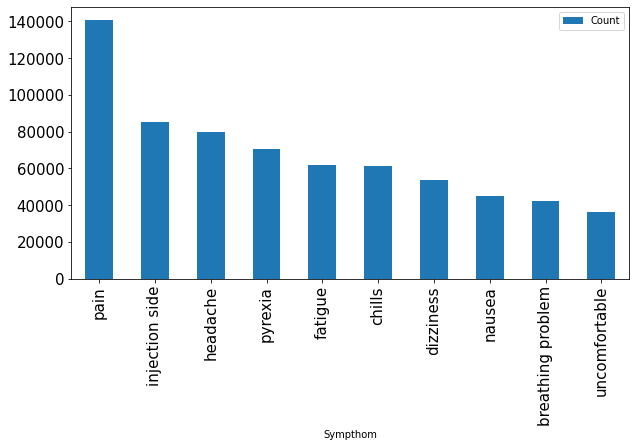

In [38]:
nsym.plot(x="Sympthom", y=["Count"], kind="bar",figsize=(10, 5),fontsize = 15)


### Plot the top 10 most frequent symptom after vaccine against vaccine manufacture

The proportion of each top10 symptom against vaccine manufacture almost same with proportion of vaccine manufacture, except symptom injection side have large different.

In [39]:
pfizer=ndf[ndf['VAX_MANU']=='PFIZER\BIONTECH'].reset_index(drop=True)
pfizers=[]
for i in range(len(pfizer)):
    pfizers+=[pfizer.iloc[i,0]]
    pfizers+=[pfizer.iloc[i,1]]   
    pfizers+=[pfizer.iloc[i,2]]
    pfizers+=[pfizer.iloc[i,3]]
    pfizers+=[pfizer.iloc[i,4]]
pp=(pd.DataFrame(pfizers).value_counts()[0:20])

moderna=ndf[ndf['VAX_MANU']=='MODERNA'].reset_index(drop=True)
modernas=[]
for i in range(len(moderna)):
    modernas+=[moderna.iloc[i,0]]
    modernas+=[moderna.iloc[i,1]]   
    modernas+=[moderna.iloc[i,2]]
    modernas+=[moderna.iloc[i,3]]
    modernas+=[moderna.iloc[i,4]]
mo=(pd.DataFrame(modernas).value_counts()[0:20])

janssen=ndf[ndf['VAX_MANU']=='JANSSEN'].reset_index(drop=True)
janssens=[]
for i in range(len(janssen)):
    janssens+=[janssen.iloc[i,0]]
    janssens+=[janssen.iloc[i,1]]   
    janssens+=[janssen.iloc[i,2]]
    janssens+=[janssen.iloc[i,3]]
    janssens+=[janssen.iloc[i,4]]
ja=(pd.DataFrame(janssens).value_counts()[0:20])

In [40]:
npp=pp
nmo=mo
nja=ja

In [41]:
npp

pain                 57753
headache             33362
pyrexia              28476
fatigue              26528
dizziness            25520
chills               23291
breathing problem    21310
nausea               19120
injection side       18488
uncomfortable        17725
rash                  8056
covid-19              7423
pruritus              7375
tremor                7177
asthenia              6961
vomiting              6607
hyperhidrosis         6562
hypoaesthesia         6191
diarrhoea             6128
lymphadenopathy       5851
dtype: int64

In [42]:
pp=pd.DataFrame(pp)
pp.index.names = ['Sympthom1']
pp.columns=['Pfizer']
pp=pp.reset_index('Sympthom1')

mo=pd.DataFrame(mo)
mo.index.names = ['Sympthom1']
mo.columns=['Moderna']
mo=mo.reset_index('Sympthom1')

ja=pd.DataFrame(ja)
ja.index.names = ['Sympthom1']
ja.columns=['Janssen']
ja=ja.reset_index('Sympthom1')

In [43]:
pp

,Sympthom1,Pfizer
0,pain,57753
1,headache,33362
2,pyrexia,28476
3,fatigue,26528
4,dizziness,25520
5,chills,23291
6,breathing problem,21310
7,nausea,19120
8,injection side,18488
9,uncomfortable,17725


In [44]:
s1= pd.merge(pp, mo, on='Sympthom1')
s2=pd.merge(s1, ja, on='Sympthom1')
s2['Total']=s2['Pfizer']+s2['Moderna']+s2['Janssen']

In [45]:
s3=s2.sort_values('Total', ascending=False)
s3=s3.head(10)

In [46]:
s3

,Sympthom1,Pfizer,Moderna,Janssen,Total
0,pain,57753,66536,16654,140943
8,injection side,18488,62594,4058,85140
1,headache,33362,35266,11376,80004
2,pyrexia,28476,32080,9853,70409
3,fatigue,26528,28254,7187,61969
5,chills,23291,29109,8672,61072
4,dizziness,25520,20563,7521,53604
7,nausea,19120,19881,5712,44713
6,breathing problem,21310,16417,4529,42256
9,uncomfortable,17725,14633,4138,36496


<AxesSubplot:xlabel='Sympthom1'>

<Figure size 1440x720 with 0 Axes>

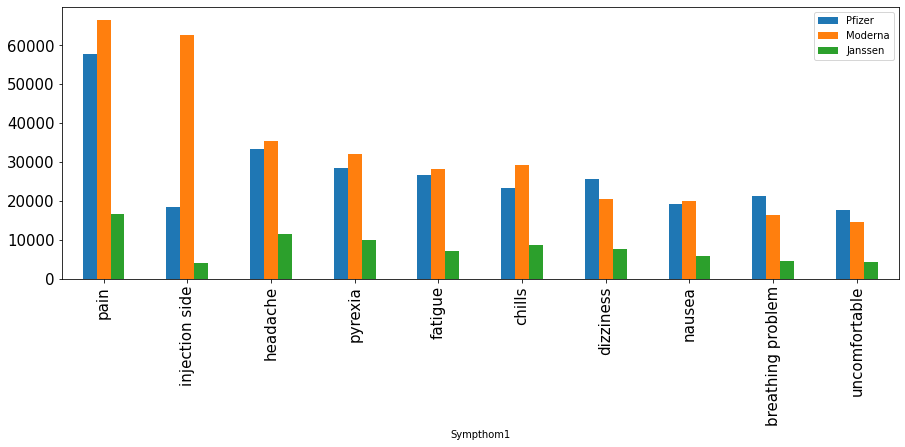

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
s3.plot(x="Sympthom1", y=["Pfizer", "Moderna","Janssen"], kind="bar",figsize=(15, 5),fontsize = 15)



### Plot the top 10 most frequent symptom against the recipiennt died after  vaccination

The symptom covid-19, breathing problem, cardiac arrest, unresponsive to stimuli, and pain is top 5 frequent symptom. Since 5th and 6th symptom already be use for top 5 symptom after vaccine, so the 7th symptom uncomfortable be selected to transform to dummy variable, use for machine learning model part.

In [48]:
died=ndf[ndf['DIED']=='Y'].reset_index(drop=True)
ds=[]
for i in range(len(died)):
    ds+=[died.iloc[i,0]]
    ds+=[died.iloc[i,1]]   
    ds+=[died.iloc[i,2]]
    ds+=[died.iloc[i,3]]
    ds+=[died.iloc[i,4]]
ds=(pd.DataFrame(ds).value_counts()[0:30])

In [49]:
ads=pd.DataFrame(ds)

In [50]:
ads.index.names = ['Sympthom']

In [51]:
ads=ads.reset_index('Sympthom')

In [52]:
ads

,Sympthom,0
0,death,3718
1,covid-19,1052
2,breathing problem,792
3,cardiac arrest,419
4,unresponsive to stimuli,387
5,pain,358
6,pyrexia,341
7,uncomfortable,337
8,resuscitation,334
9,fatigue,324


In [53]:
ds=pd.DataFrame(ds)
ds.index.names = ['Sympthom']
ds.columns=['Dead']
ds=ds.reset_index('Sympthom')

In [54]:
# since this graph is plot the recipient who died after vaccination, so will drop the symptom died
ds.drop(ds.loc[ds['Sympthom']=='death'].index, inplace=True)

In [55]:
ds=ds.head(10)

In [56]:
df=df.replace(to_replace=["sars-cov-2 test positive","covid-19 pneumonia"],value="covid-19")

<AxesSubplot:xlabel='Sympthom'>

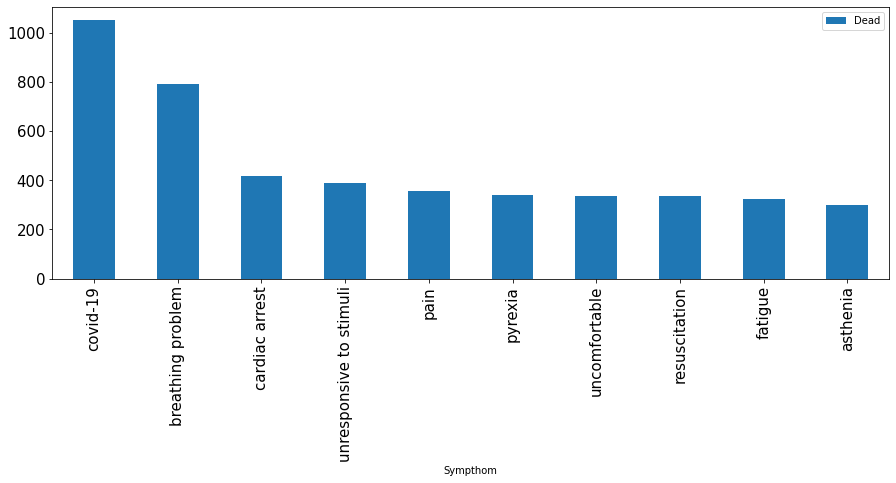

In [57]:
ds.plot(x="Sympthom", y=["Dead"], kind="bar",figsize=(15, 5),fontsize = 15)

### Plot the top 10 most frequent current illness against the recipiennt died after  vaccination

The symptom covid-19, uti (urinary tract infection), hypertension, diabetes, and copd is top 5 frequent current illness. This 5 illness will be selected to transform to dummy variable, use for machine learning model part.

In [58]:
Cur_ill_died=ndf[ndf['DIED']=='Y'].reset_index(drop=True)
CID=[]
for i in range(len(Cur_ill_died)):
    CID+=[Cur_ill_died.iloc[i,11]]
    
CID=(pd.DataFrame(CID).value_counts()[0:20])

In [59]:
CID=pd.DataFrame(CID)
CID.index.names = ['Current Illness']
CID.columns=['Dead']
CID=CID.reset_index('Current Illness')

In [60]:
# Drop the no illness 
CID.drop(CID.loc[CID['Current Illness']=='n'].index, inplace=True)

In [61]:
# Drop the illness which cannot define it 
CID.drop(CID.loc[CID['Current Illness']=='factor v leiden mutation, heterozygous(on warfarin since 2015)'].index, inplace=True)
CID.drop(CID.loc[CID['Current Illness']=='alcohol use disorder, facial laceration, alcohol intoxication, secondary syphillis'].index, inplace=True)

In [62]:
CID=CID.head(5)

In [63]:
CID

,Current Illness,Dead
1,covid-19,46
2,uti,44
3,hypertension,20
4,copd,16
6,diabetes,14


<AxesSubplot:xlabel='Current Illness'>

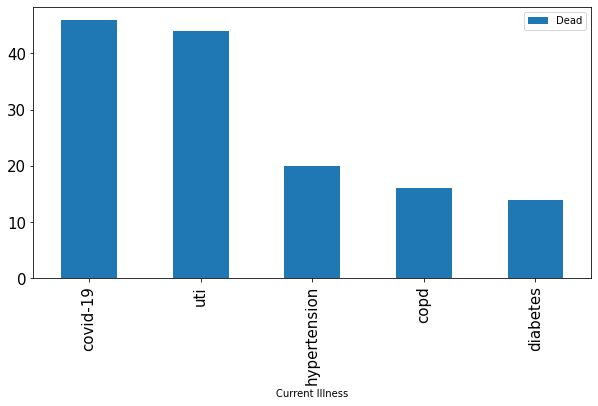

In [64]:
CID.plot(x="Current Illness", y="Dead", kind="bar",figsize=(10, 5),fontsize = 15)

# Data Preprocessing
1) For binary category column, use label encoder change to 0 and 1.

2) For multi category column, use get dummies to create dummy variable.

3) Create new columns for top 5 frequency symptom and top 5 frequency symptom for died

4) Create new columns for top 5 frenquency current illness when the recipient died after vaccine

In [65]:
# Store the data to ndf2 from ndf. For backup purpose
ndf2=ndf

In [66]:
#top 5 frequency symptom
ndf2['S_Headache'] = np.where((ndf2['SYMPTOM1']=='headache') | (ndf2['SYMPTOM2']=='headache') | (ndf2['SYMPTOM3']=='headache') |
                           (ndf2['SYMPTOM4']=='headache') | (ndf2['SYMPTOM5']=='headache'), 1, 0)

ndf2['S_Pain'] = np.where((ndf2['SYMPTOM1']=='pain') | (ndf2['SYMPTOM2']=='pain') | (ndf2['SYMPTOM3']=='pain') |
                           (ndf2['SYMPTOM4']=='pain') | (ndf2['SYMPTOM5']=='pain'), 1, 0)

ndf2['S_Pyrexia'] = np.where((ndf2['SYMPTOM1']=='pyrexia') | (ndf2['SYMPTOM2']=='pyrexia') | (ndf2['SYMPTOM3']=='pyrexia') |
                           (ndf2['SYMPTOM4']=='pyrexia') | (ndf2['SYMPTOM5']=='pyrexia'), 1, 0)

ndf2['S_Injection side affect'] = np.where((ndf2['SYMPTOM1']=='injection side') | (ndf2['SYMPTOM2']=='injection side') | (ndf2['SYMPTOM3']=='injection side') |
                           (ndf2['SYMPTOM4']=='injection side') | (ndf2['SYMPTOM5']=='injection side'), 1, 0)

ndf2['S_Fatigue'] = np.where((ndf2['SYMPTOM1']=='fatigue') | (ndf2['SYMPTOM2']=='fatigue') | (ndf2['SYMPTOM3']=='fatigue') |
                           (ndf2['SYMPTOM4']=='fatigue') | (ndf2['SYMPTOM5']=='fatigue'), 1, 0)

# top 5 frequency symptom for died
ndf2['S_Covid-19'] = np.where((ndf2['SYMPTOM1']=='covid-19') | (ndf2['SYMPTOM2']=='covid-19') | (ndf2['SYMPTOM3']=='covid-19') |
                           (ndf2['SYMPTOM4']=='covid-19') | (ndf2['SYMPTOM5']=='covid-19'), 1, 0)

ndf2['S_Breathing problem'] = np.where((ndf2['SYMPTOM1']=='breathing problem') | (ndf2['SYMPTOM2']=='breathing problem') | (ndf2['SYMPTOM3']=='breathing problem') |
                           (ndf2['SYMPTOM4']=='breathing problem') | (ndf2['SYMPTOM5']=='breathing problem'), 1, 0)

ndf2['S_Cardiac arrest'] = np.where((ndf2['SYMPTOM1']=='cardiac arrest') | (ndf2['SYMPTOM2']=='cardiac arrest') | (ndf2['SYMPTOM3']=='cardiac arrest') |
                           (ndf2['SYMPTOM4']=='cardiac arrest') | (ndf2['SYMPTOM5']=='cardiac arrest'), 1, 0)

ndf2['S_Unresponsive to stimuli'] = np.where((ndf2['SYMPTOM1']=='unresponsive to stimuli') | (ndf2['SYMPTOM2']=='unresponsive to stimuli') | (ndf2['SYMPTOM3']=='unresponsive to stimuli') |
                           (ndf2['SYMPTOM4']=='unresponsive to stimuli') | (ndf2['SYMPTOM5']=='unresponsive to stimuli'), 1, 0)

ndf2['S_Uncomfortable'] = np.where((ndf2['SYMPTOM1']=='uncomfortable') | (ndf2['SYMPTOM2']=='uncomfortable') | (ndf2['SYMPTOM3']=='uncomfortable') |
                           (ndf2['SYMPTOM4']=='uncomfortable') | (ndf2['SYMPTOM5']=='uncomfortable'), 1, 0)

In [67]:
ndf2['CI_covid-19'] = np.where((ndf2['CUR_ILL'].str.contains('covid')),1,0)
ndf2['CI_hypertension'] = np.where((ndf2['CUR_ILL'].str.contains('hypertension')),1,0)
ndf2['CI_uti'] = np.where((ndf2['CUR_ILL'].str.contains('uti')) | (ndf2['CUR_ILL'].str.contains('urinary tract infection')),1,0)
ndf2['CI_diabetes'] = np.where((ndf2['CUR_ILL'].str.contains('diabetes')),1,0)
ndf2['CI_copd'] = np.where((ndf2['CUR_ILL'].str.contains('copd')) | (ndf2['CUR_ILL'].str.contains('Chronic Obstructive Pulmonary Disease')),1,0)

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
for i in bi_cat_cols :
    ndf2[i] = le.fit_transform(ndf2[i])
    
for i in target_col :
    ndf2[i] = le.fit_transform(ndf2[i])

In [69]:
ndf2 = pd.get_dummies(data = ndf2,columns = cat_cols )

In [70]:
ndf2

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,AGE_YRS,SEX,DIED,DISABLE,CUR_ILL,...,VAX_MANU_MODERNA,VAX_MANU_PFIZER\BIONTECH,RECOVD_N,RECOVD_U,RECOVD_Y,age_group_Child,age_group_Senior Adult,age_group_Senior Citizen,age_group_Very Senior Citizen,age_group_Young Adult
0,dysphagia,epiglottitis,NaN,NaN,NaN,33.0,0,0,0,n,...,1,0,0,0,1,0,0,0,0,1
1,anxiety,breathing problem,NaN,NaN,NaN,73.0,0,0,0,patient residing at nursing facility. see pati...,...,1,0,0,0,1,0,0,1,0,0
2,breathing problem,dysphagia,pain,visual impairment,NaN,23.0,0,0,0,n,...,0,1,0,1,0,0,0,0,0,1
3,dizziness,fatigue,mobility decreased,NaN,NaN,58.0,0,0,0,kidney infection,...,1,0,0,0,1,0,1,0,0,0
4,injection side,injection side,injection side,injection side,NaN,47.0,0,0,0,n,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603455,dizziness,unresponsive to stimuli,NaN,NaN,NaN,18.0,1,0,0,n,...,0,1,0,0,1,0,0,0,0,1
603456,asthenia,confusional state,diarrhoea,dizziness,fatigue,33.0,0,0,0,n,...,0,1,0,1,0,0,0,0,0,1
603457,lethargy,uncomfortable,nausea,seizure,dizziness,33.0,0,0,0,n,...,0,1,0,1,0,0,0,0,0,1
603459,incorrect dose administered,NaN,NaN,NaN,NaN,20.0,0,0,0,n,...,0,1,0,0,1,0,0,0,0,1


In [71]:
# Drop the symptom 1 to 5, current illness and AGE_YRS
ndf2=ndf2.drop(['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5','AGE_YRS','CUR_ILL'],axis='columns')

In [72]:
# Check the no of unique of final data set
ndf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470404 entries, 0 to 603461
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   SEX                            470404 non-null  int32
 1   DIED                           470404 non-null  int32
 2   DISABLE                        470404 non-null  int32
 3   BIRTH_DEFECT                   470404 non-null  int32
 4   S_Headache                     470404 non-null  int32
 5   S_Pain                         470404 non-null  int32
 6   S_Pyrexia                      470404 non-null  int32
 7   S_Injection side affect        470404 non-null  int32
 8   S_Fatigue                      470404 non-null  int32
 9   S_Covid-19                     470404 non-null  int32
 10  S_Breathing problem            470404 non-null  int32
 11  S_Cardiac arrest               470404 non-null  int32
 12  S_Unresponsive to stimuli      470404 non-null  int32
 13 

# Data imbalanced
Since target variable is not balanced, so using random under sampling to resampling it.

In [73]:
X = ndf2.drop(['DIED'],axis=1)
y = ndf2['DIED']

In [74]:
count_y=y.value_counts()
count_y

0    462839
1      7565
Name: DIED, dtype: int64

In [75]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(sampling_strategy='majority',random_state=34)
X, y = sm.fit_resample(X, y)

In [76]:
count_y=y.value_counts()
count_y

0    7565
1    7565
Name: DIED, dtype: int64

# Model Building

###### Split the dataset into training set and testing set

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=34)

In [78]:
len(X_train)+len(X_test)

15130

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score

## Random forest

In [80]:
#Random Forest algorithm
randomforest = RandomForestClassifier()

#train using the algorithm
randomforest.fit(X_train,y_train.values.ravel())

#use the trained set to do prediction on test set
y_pred_rf=randomforest.predict(X_test)

In [81]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
f1_score_rf=f1_score(y_test,y_pred_rf)
ROC_rf=roc_auc_score(y_test,y_pred_rf)

In [82]:
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)

[[1840  422]
 [ 242 2035]]


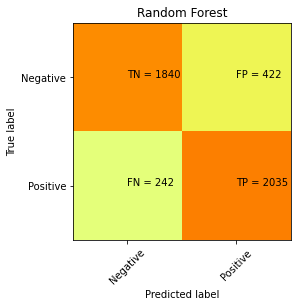

In [83]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Logistic Regression

In [84]:
#Logistic Regression algorithm
lr = LogisticRegression()

#train using the algorithm
lr.fit(X_train, y_train.values.ravel())

#use the trained set to do prediction on test set
y_pred_lr = lr.predict(X_test)

In [85]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)
recall_lr=recall_score(y_test,y_pred_lr)
precision_lr=precision_score(y_test,y_pred_lr)
f1_score_lr=f1_score(y_test,y_pred_lr)
ROC_lr=roc_auc_score(y_test,y_pred_lr)

In [86]:
cm=confusion_matrix(y_test,y_pred_lr)
print(cm)

[[1951  311]
 [ 314 1963]]


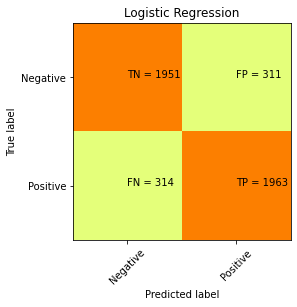

In [87]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Support Vector Machine

In [88]:
#Support Vector Machine algorithm
svc=SVC()

#train using the algorithm
svc.fit(X_train,y_train.values.ravel())

#use the trained set to do prediction on test set
y_pred_sv=svc.predict(X_test)

In [89]:
accuracy_sv=accuracy_score(y_test,y_pred_sv)
recall_sv=recall_score(y_test,y_pred_sv)
precision_sv=precision_score(y_test,y_pred_sv)
f1_score_sv=f1_score(y_test,y_pred_sv)
ROC_sv=roc_auc_score(y_test,y_pred_sv)

In [90]:
cm=confusion_matrix(y_test,y_pred_sv)
print(cm)

[[1925  337]
 [ 268 2009]]


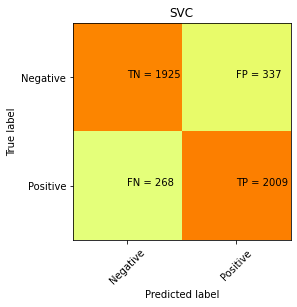

In [91]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVC')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## K-Nearest Neighbour 

In [92]:
#K-Nearest Neighbour algorithm
neigh = KNeighborsClassifier(n_neighbors=3)

#train using the algorithm
neigh.fit(X_train,y_train.values.ravel()) 

#use the trained set to do prediction on test set
y_pred_knn=neigh.predict(X_test)

In [93]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)
recall_knn=recall_score(y_test,y_pred_knn)
precision_knn=precision_score(y_test,y_pred_knn)
f1_score_knn=f1_score(y_test,y_pred_knn)
ROC_knn=roc_auc_score(y_test,y_pred_knn)

In [94]:
cm=confusion_matrix(y_test,y_pred_knn)
print(cm)

[[1820  442]
 [ 343 1934]]


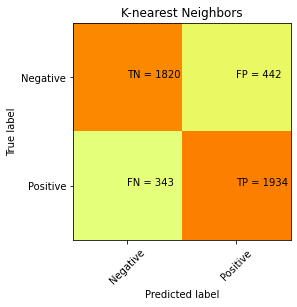

In [95]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('K-nearest Neighbors')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Gaussian Naive Bayes

In [96]:
#Gaussian Naive Bayes algorithm
nb = GaussianNB()

#train using the algorithm
nb.fit(X_train,y_train.values.ravel())

#use the trained set to do prediction on test set
y_pred_nb=nb.predict(X_test)

In [97]:
accuracy_nb=accuracy_score(y_test,y_pred_nb)
recall_nb=recall_score(y_test,y_pred_nb)
precision_nb=precision_score(y_test,y_pred_nb)
f1_score_nb=f1_score(y_test,y_pred_nb)
ROC_nb=roc_auc_score(y_test,y_pred_nb)

In [98]:
cm=confusion_matrix(y_test,y_pred_nb)
print(cm)

[[2009  253]
 [ 525 1752]]


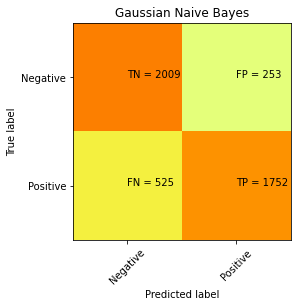

In [99]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Decision Tree

In [100]:
#Decision Tree algorithm
dt = DecisionTreeClassifier()

#train using the algorithm
dt.fit(X_train,y_train)

#use the trained set to do prediction on test set
y_pred_dt=dt.predict(X_test)

In [101]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
f1_score_dt=f1_score(y_test,y_pred_dt)
ROC_dt=roc_auc_score(y_test,y_pred_dt)

In [102]:
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)

[[1848  414]
 [ 276 2001]]


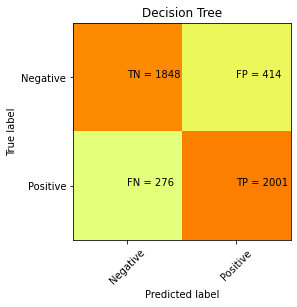

In [103]:
#plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Artificial Neural Network

In [104]:
# first neural network with keras make predictions
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Recall','Precision'])
    # fit the keras model on the dataset

In [105]:
model.fit(X_train, y_train, epochs=150, batch_size=15)


Epoch 1/150
707/707 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7978 - recall: 0.9118 - precision: 0.745 - 46s 2ms/step - loss: 0.4947 - accuracy: 0.7989 - recall: 0.9114 - precision: 0.7469
Epoch 2/150
707/707 [==============================] - 1s 2ms/step - loss: 0.3104 - accuracy: 0.8649 - recall: 0.8717 - precision: 0.8616
Epoch 3/150
707/707 [==============================] - 1s 2ms/step - loss: 0.3009 - accuracy: 0.8672 - recall: 0.8666 - precision: 0.8661
Epoch 4/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2901 - accuracy: 0.8734 - recall: 0.8733 - precision: 0.8730
Epoch 5/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.8702 - recall: 0.8706 - precision: 0.8677
Epoch 6/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2966 - accuracy: 0.8670 - recall: 0.8743 - precision: 0.8644
Epoch 7/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2999 - accurac

707/707 [==============================] - 1s 2ms/step - loss: 0.2840 - accuracy: 0.8744 - recall: 0.9062 - precision: 0.8540
Epoch 60/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2861 - accuracy: 0.8701 - recall: 0.8851 - precision: 0.8561
Epoch 61/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.8731 - recall: 0.8801 - precision: 0.8665
Epoch 62/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.8755 - recall: 0.8908 - precision: 0.8668
Epoch 63/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.8745 - recall: 0.8940 - precision: 0.8587
Epoch 64/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.8785 - recall: 0.8956 - precision: 0.8694
Epoch 65/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.8669 - recall: 0.8882 - precision: 0.8546
Epoch 66/150
707/707 [==================

707/707 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.8768 - recall: 0.8928 - precision: 0.8668
Epoch 118/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.8758 - recall: 0.9084 - precision: 0.8541
Epoch 119/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.8738 - recall: 0.8890 - precision: 0.8595
Epoch 120/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.8750 - recall: 0.8966 - precision: 0.8581
Epoch 121/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.8734 - recall: 0.8858 - precision: 0.8595
Epoch 122/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.8730 - recall: 0.8979 - precision: 0.8557
Epoch 123/150
707/707 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.8730 - recall: 0.8932 - precision: 0.8577
Epoch 124/150
707/707 [===========

In [106]:
y_pred_ann=model.predict_classes(X_test)

C:\Users\user\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [107]:
accuracy_ann=accuracy_score(y_test,y_pred_ann)
recall_ann=recall_score(y_test,y_pred_ann)
precision_ann=precision_score(y_test,y_pred_ann)
f1_score_ann=f1_score(y_test,y_pred_ann)
ROC_ann=roc_auc_score(y_test,y_pred_ann)

In [108]:
confusion_mtx = confusion_matrix(y_test, y_pred_ann) 
print(confusion_mtx)

[[1846  416]
 [ 224 2053]]


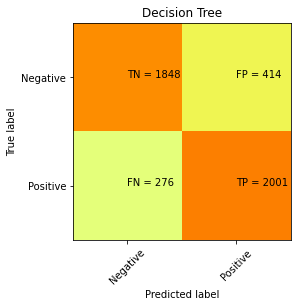

In [109]:
plt.clf()
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Model Performance

### Model Performance metrics 

In [110]:
def model_report(accuracy,recall,precision,f1score,name,ROC) :
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recall],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "ROC_score"       : [ROC]
                       
                      })
    return df

#outputs for every model
model1 = model_report(accuracy_lr,recall_lr,precision_lr,f1_score_lr,
                      "Logistic Regression",ROC_lr)

model2 = model_report(accuracy_dt,recall_dt,precision_dt,f1_score_dt,
                       "Decision Tree",ROC_dt)

model3 = model_report(accuracy_knn,recall_knn,precision_knn,f1_score_knn,
                      "KNN Classifier",ROC_knn)

model4 = model_report(accuracy_rf,recall_rf,precision_rf,f1_score_rf,
                      "Random Forest Classifier",ROC_rf)

model5 = model_report(accuracy_nb,recall_nb,precision_nb,f1_score_nb,
                      "Gaussian Naive Bayes",ROC_nb)

model6 = model_report(accuracy_sv,recall_sv,precision_sv,f1_score_sv,
                      "SVM Classifier Linear",ROC_sv)

model7=model_report(accuracy_ann,recall_ann,precision_ann,f1_score_ann,
                      "ANN",ROC_ann)

#concat all models
model_performances = pd.concat([model1, model2, model3, model4, model5, model6, model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

# Evaluation

The supervised algorithms used are Logistic Regression, Decision Tree, K-NearestNeighbour (KNN), Random Forest, Gaussian Naive Bayes, Support Vector Machine (SVM), and Artificial Neural network (ANN) algorithms to fit the test and train models.

### Accuracy
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

### Recall
Recall is the ratio of correctly predicted positive observations to the all observations in actual class

### F1-score
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### Precision or Recall?
From the point of view, the recall score is more important than Precision score. This is because in this project, the False Negtive meaning that the recipient who predicted not died after died actually they died. The Recall score formula is TP/(TP + FN), so the smallest of FN, the highest of Recall score. 

# Model Deployment

### 6.1 Conclusion
As a result, it was shown that Artificial Neural Network is the best algorithm to evaluate whether the recipeint after vaccine will died or not, as its Recall Score (0.9016) is the highest among the other algorithms. Therefore, it will be chosen for implementation.



# Prediction using random forest algorithm

Below is the example

Male

Adult

Vaccine: Pfizer

Recovered Status: Yes

Current Illness: Hypertension, Diabetes

Symptom: Headahce, Pyrexia, Injection side affect


In [111]:
row = [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0  ]

In [114]:
from numpy import asarray
newX = asarray([row])
yhat = model.predict_classes(newX)
print('Predicted: %s' % yhat[0])

Predicted: [0]


C:\Users\user\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

